In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets,transforms

In [ ]:
tfm=transforms.Compose([
    transforms.ToTensor()
    ])
tfm2=transforms.Compose([
    transforms.RandomHorizontalFlip(0.6),
    transforms.ToTensor()
    ])

In [ ]:
from torch.utils.data import DataLoader
train=datasets.CIFAR10(root='data',train=True,download=True,transform=tfm2)

In [ ]:
test=datasets.CIFAR10(root='data',train=False,download=True,transform=tfm)

In [ ]:
len(train),len(test)

(50000, 10000)

In [ ]:
training=DataLoader(train,batch_size=33,shuffle=True,num_workers=2)
testing=DataLoader(test,batch_size=33,num_workers=2)

In [ ]:
image,label=test[100]
image,label

(tensor([[[0.4627, 0.4627, 0.4706,  ..., 0.1882, 0.1255, 0.1137],
          [0.4549, 0.4549, 0.4627,  ..., 0.1647, 0.0980, 0.0863],
          [0.4941, 0.4902, 0.4941,  ..., 0.1020, 0.1098, 0.1098],
          ...,
          [0.6706, 0.6510, 0.6314,  ..., 0.7176, 0.7059, 0.6902],
          [0.6353, 0.6706, 0.6314,  ..., 0.6824, 0.6902, 0.6745],
          [0.5529, 0.6314, 0.6314,  ..., 0.7098, 0.7137, 0.7255]],
 
         [[0.5216, 0.5216, 0.5294,  ..., 0.2784, 0.2039, 0.1882],
          [0.5137, 0.5176, 0.5255,  ..., 0.2549, 0.1490, 0.1451],
          [0.5373, 0.5373, 0.5490,  ..., 0.1608, 0.1804, 0.2157],
          ...,
          [0.6706, 0.6431, 0.6314,  ..., 0.6980, 0.6863, 0.6745],
          [0.6471, 0.6471, 0.6118,  ..., 0.6706, 0.6784, 0.6588],
          [0.5843, 0.6078, 0.6000,  ..., 0.7059, 0.7098, 0.7059]],
 
         [[0.6549, 0.6510, 0.6588,  ..., 0.2549, 0.1451, 0.1176],
          [0.6471, 0.6431, 0.6510,  ..., 0.2000, 0.0980, 0.0941],
          [0.6588, 0.6549, 0.6667,  ...,

In [ ]:
classo=train.classes

In [ ]:
classo

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
class_id=train.class_to_idx

In [ ]:
class_id

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

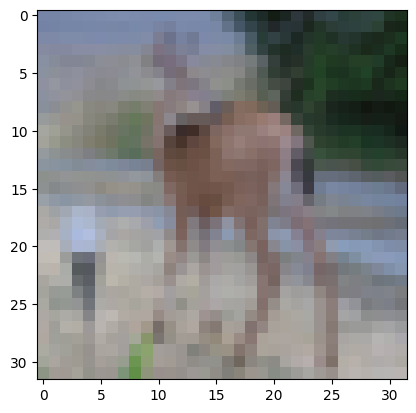

In [ ]:
import matplotlib.pyplot as plt
im_np=image.permute(1,2,0).numpy()
plt.imshow(im_np)

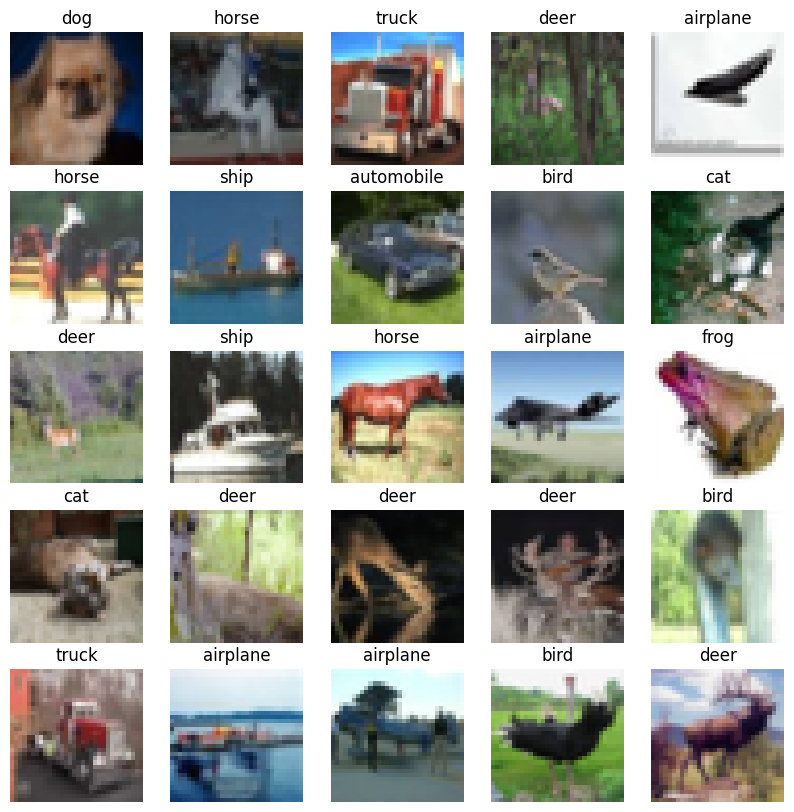

In [ ]:
fig=plt.figure(figsize=(10,10))
r,c=5,5
for i in range(1,r*c+1):
  rand=torch.randint(0,len(train),size=(1,)).item()
  img,label=train[rand]
  fig.add_subplot(r,c,i)
  plt.imshow(img.permute(1,2,0).numpy())
  plt.title(classo[label])
  plt.axis('off')

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Sequential(
        nn.Conv2d(3,64,3,padding=1),
        nn.ReLU(),
        nn.Conv2d(64,64,3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.layer2=nn.Sequential(
        nn.Conv2d(64,128,3,padding=1),
        nn.ReLU(),
        nn.Conv2d(128,128,3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.layer3=nn.Sequential(
        nn.Conv2d(128,256,3,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,256,3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.classify=nn.Sequential(
        nn.AdaptiveAvgPool2d((1,1)),
        nn.Flatten(),
        nn.Linear(256,10)
    )
  def forward(self,x):
    return self.classify(self.layer3(self.layer2(self.layer1(x))))

In [ ]:
model=Model()

In [ ]:
model

Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classify): Sequential(
    (0): AdaptiveAvgPool2d(output_size=(1, 1))
    (1): Flatten(start_dim=1, en

In [ ]:
lossf=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters(),lr=1e-4)
sch=torch.optim.lr_scheduler.ReduceLROnPlateau(optim, mode='min', factor=0.3, patience=2)

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(69)
from sklearn.metrics import accuracy_score

epochs=10

for epoch in tqdm(range(epochs)):
  train_loss=0
  model.train()
  for batch,(X,y) in enumerate(training):
    y_preds=model(X)
    loss=lossf(y_preds,y)
    train_loss+=loss.item()
    optim.zero_grad()
    loss.backward()
    optim.step()

    if batch%100==0:
      print(f"Looked at {batch * len(X)}/{len(training.dataset)} samples")

  train_loss/=len(training)
  test_loss=0
  test_accuracy=0
  model.eval()
  with torch.inference_mode():
    for X,y in testing:
      test_preds=model(X)
      loss=lossf(test_preds,y)
      test_loss+=loss.item()
      test_accuracy+= accuracy_score(y.numpy(),test_preds.argmax(dim=1).numpy())
    test_loss /= len(testing)
    test_accuracy /= len(testing)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%\n")
    sch.step(test_loss)

  0%|          | 0/10 [00:00<?, ?it/s]

Looked at 0/50000 samples
Looked at 3300/50000 samples
Looked at 6600/50000 samples
Looked at 9900/50000 samples
Looked at 13200/50000 samples
Looked at 16500/50000 samples
Looked at 19800/50000 samples
Looked at 23100/50000 samples
Looked at 26400/50000 samples
Looked at 29700/50000 samples
Looked at 33000/50000 samples
Looked at 36300/50000 samples
Looked at 39600/50000 samples
Looked at 42900/50000 samples
Looked at 46200/50000 samples
Looked at 49500/50000 samples

Train loss: 1.68826 | Test loss: 1.56056, Test acc: 0.42%

Looked at 0/50000 samples
Looked at 3300/50000 samples
Looked at 6600/50000 samples
Looked at 9900/50000 samples
Looked at 13200/50000 samples
Looked at 16500/50000 samples
Looked at 19800/50000 samples
Looked at 23100/50000 samples
Looked at 26400/50000 samples
Looked at 29700/50000 samples
Looked at 33000/50000 samples
Looked at 36300/50000 samples
Looked at 39600/50000 samples
Looked at 42900/50000 samples
Looked at 46200/50000 samples
Looked at 49500/50000 sa